In [1]:
import pandas as pd
import sqlite3

In [2]:
db = sqlite3.connect('../../datasets/checking-logs.sqlite')

In [3]:
v=pd.read_sql(""" SELECT * FROM checker""", db)
v.head()

,index,status,success,timestamp,numTrials,labname,uid
0,0,checking,0,2020-04-16 21:12:50.740474,5,None,admin_1
1,1,ready,0,2020-04-16 21:12:54.708365,5,code_rvw,admin_1
2,2,checking,0,2020-04-16 21:46:47.769088,7,None,admin_1
3,3,ready,0,2020-04-16 21:46:48.121217,7,lab02,admin_1
4,4,checking,0,2020-04-16 21:53:01.862637,6,code_rvw,admin_1


In [4]:

query = """ SELECT datetime FROM pageviews
WHERE uid LIKE 'user_%' 
"""
views = pd.read_sql(query, db, parse_dates=['datetime'])


In [5]:

views_count = (views.assign(date = views['datetime'].dt.date).groupby('date').size().reset_index(name='views')).sort_values('date', ascending = True)
views_count['date'] = pd.to_datetime(views_count['date'])
views_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    33 non-null     datetime64[ns]
 1   views   33 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 660.0 bytes


In [6]:
query = """ SELECT DATE(timestamp) AS date, COUNT(*) AS count FROM checker
WHERE uid LIKE 'user_%' 
GROUP BY date
"""
commits = pd.read_sql(query, db, parse_dates=['date'])

In [7]:
common_dates = set(views_count['date']).intersection(set(commits['date']))
views_count = views_count[views_count['date'].isin(common_dates)].sort_values('date')
commits = commits[commits['date'].isin(common_dates)].sort_values('date')

In [8]:
commits.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    32 non-null     datetime64[ns]
 1   count   32 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 768.0 bytes


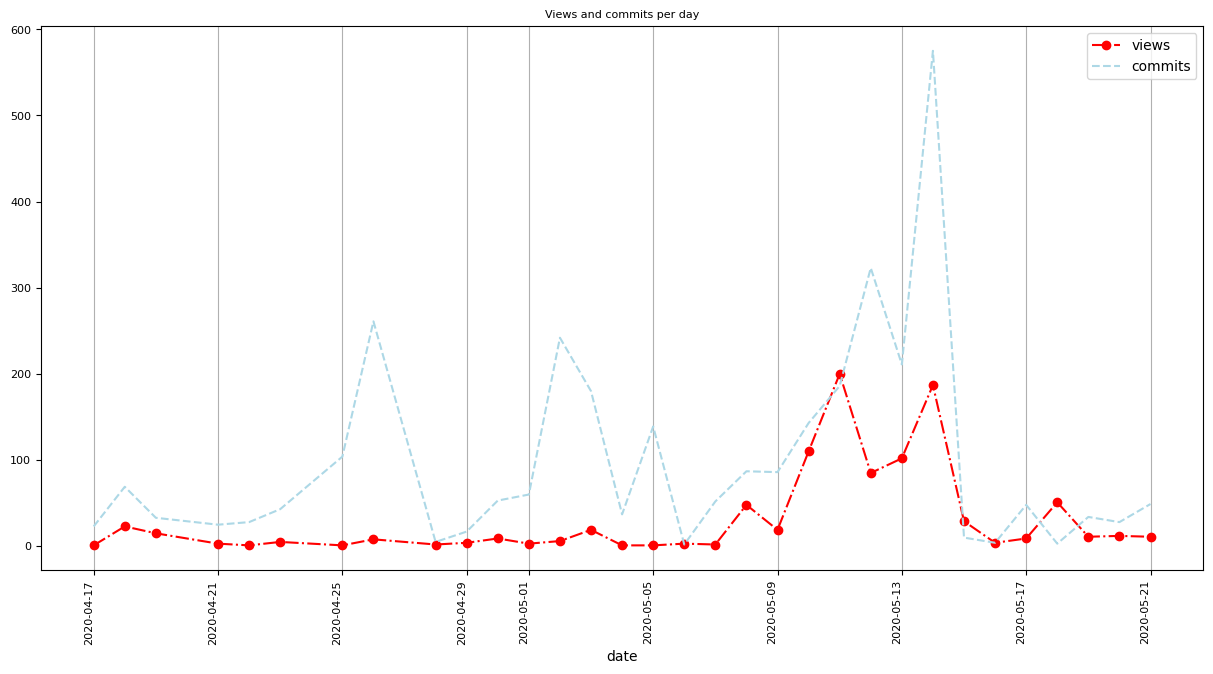

In [9]:
ax = views_count.plot(x='date', y='views', kind='line', style='o-.', color='red', label='views', rot=90, fontsize=8, figsize=(15, 8))
commits.plot(x='date', y='count', kind='line', style='--', color='lightblue', label='commits',rot=90, ax = ax)
ax.set_title('Views and commits per day', fontsize=8)
ax.xaxis.grid()

In [10]:
db.close()

How many times was the number of views larger than 150? 
The answer is 2